In [1]:
#calculate no of gold medals for USA 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
data = pd.read_csv('olympicmedal.csv',encoding = "ISO-8859-1")
data

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze
...,...,...,...,...,...,...,...,...,...,...,...
15428,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"GUENOT, Christophe",Men,FRA,France,M,Bronze
15429,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"KVIRKELIA, Manuchar",Men,GEO,Georgia,M,Gold
15430,Beijing,2008.0,Wrestling,Wrestling Gre-R,55 - 60kg,"RAHIMOV, Vitaliy",Men,AZE,Azerbaijan,M,Silver
15431,Beijing,2008.0,Wrestling,Wrestling Gre-R,60 - 66kg,"GUENOT, Steeve",Men,FRA,France,M,Gold


In [16]:
df=data.drop(columns=['City','Discipline', 'Event', 'Athlete', 'Gender','Country','Event_gender'])
df1=df.loc[(df['Country_Code']=='USA')]
df1


,Year,Sport,Country_Code,Medal
2,1976.0,Aquatics,USA,Gold
4,1976.0,Aquatics,USA,Bronze
5,1976.0,Aquatics,USA,Silver
7,1976.0,Aquatics,USA,Bronze
11,1976.0,Aquatics,USA,Gold
...,...,...,...,...
15314,2008.0,Volleyball,USA,Gold
15316,2008.0,Volleyball,USA,Silver
15380,2008.0,Wrestling,USA,Gold
15398,2008.0,Wrestling,USA,Bronze


In [17]:
df11=df1.groupby('Year')['Medal'].apply(lambda x: (x=='Gold').sum()).reset_index(name='Gold medal count')
df11

,Year,Gold medal count
0,1976.0,63
1,1984.0,168
2,1988.0,77
3,1992.0,89
4,1996.0,160
5,2000.0,130
6,2004.0,116
7,2008.0,125


In [21]:
df12=df1.groupby('Year')['Medal'].count().reset_index(name='Total medal count')
df12

,Year,Total medal count
0,1976.0,155
1,1984.0,333
2,1988.0,193
3,1992.0,224
4,1996.0,260
5,2000.0,248
6,2004.0,264
7,2008.0,315


In [25]:
df13=pd.concat([df11['Year'],df11['Gold medal count'], df12['Total medal count']], axis=1, keys=['Year', 'Gold medal count','Total medal count'])
df13['Percentage of gold medal']=df13['Gold medal count']/df13['Total medal count']


,Year,Gold medal count,Total medal count,Percentage of gold medal
0,1976.0,63,155,0.406452
1,1984.0,168,333,0.504505
2,1988.0,77,193,0.398964
3,1992.0,89,224,0.397321
4,1996.0,160,260,0.615385
5,2000.0,130,248,0.524194
6,2004.0,116,264,0.439394
7,2008.0,125,315,0.396825


Text(0.5, 1.0, 'Percentage of gold medal')

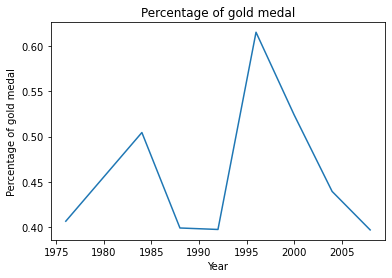

In [26]:
sns.lineplot(x='Year',y='Percentage of gold medal',data=df13).set_title('Percentage of gold medal')

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

X_train,X_test,y_train,y_test= train_test_split(df13['Year'],df13['Percentage of gold medal'])
X_train_df, X_test_df=pd.DataFrame(X_train), pd.DataFrame(X_test)


poly= PolynomialFeatures(degree=4)
X_train_poly,X_test_poly= poly.fit_transform(X_train_df),poly.fit_transform(X_test_df)

model=linear_model.LinearRegression()
model=model.fit(X_train_poly, y_train)
coef=model.coef_
intercept=model.intercept_
coef

array([ 0.00000000e+00,  3.90277032e-05,  5.12431180e-02, -3.44548695e-05,
        6.51572726e-09])

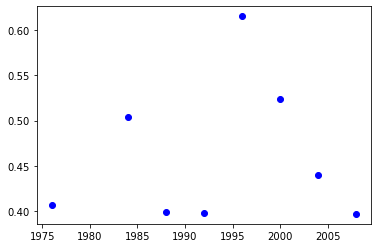

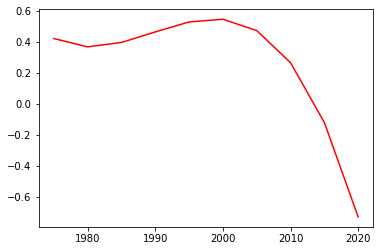

In [44]:
plt.scatter(df13['Year'],df13['Percentage of gold medal'],color='b')
plt.show()

x_input=np.arange(1975,2025,5)
y_predicted=intercept + coef[1]*x_input+coef[2]*x_input**2+coef[3]*x_input**3+coef[4]*x_input**4
plt.plot(x_input,y_predicted,color='r')
#conclusion= use mean value instead

In [47]:
df13['Percentage of gold medal'].mean()

0.4603798470675195